# K-Means Clustering on a Unique Dataset

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

##  Data Loading and Preprocessing

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Gender']

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

In [5]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


## Exploratory Data Analysis (EDA)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

####  Distribution of key features like Age, Annual Income (k$), and Spending Score

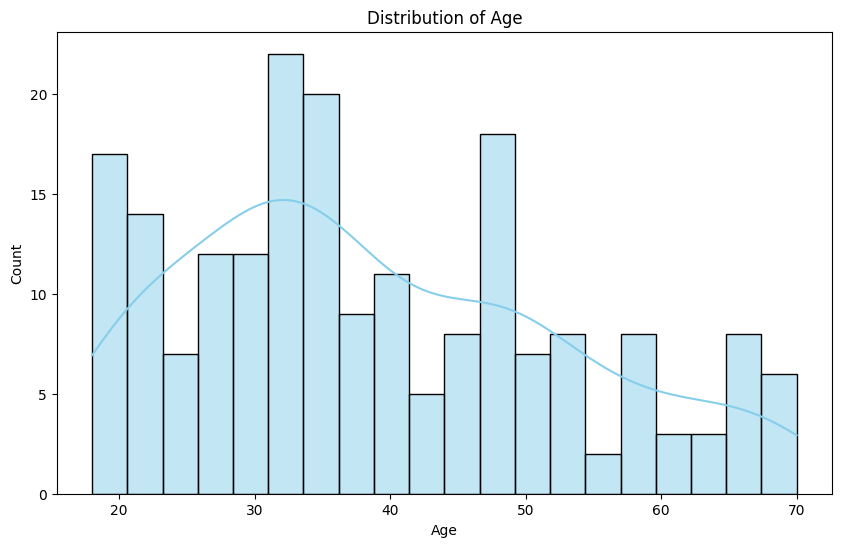

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

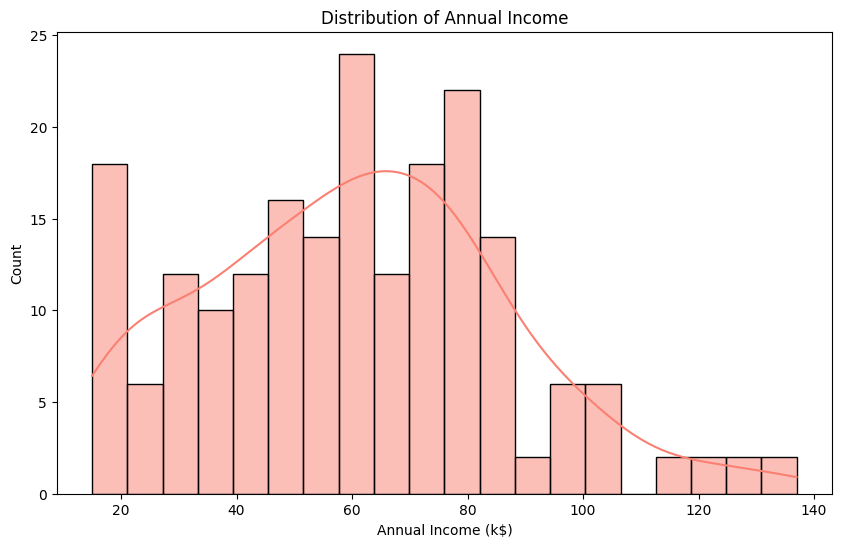

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Annual Income (k$)', bins=20, kde=True, color='salmon')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()

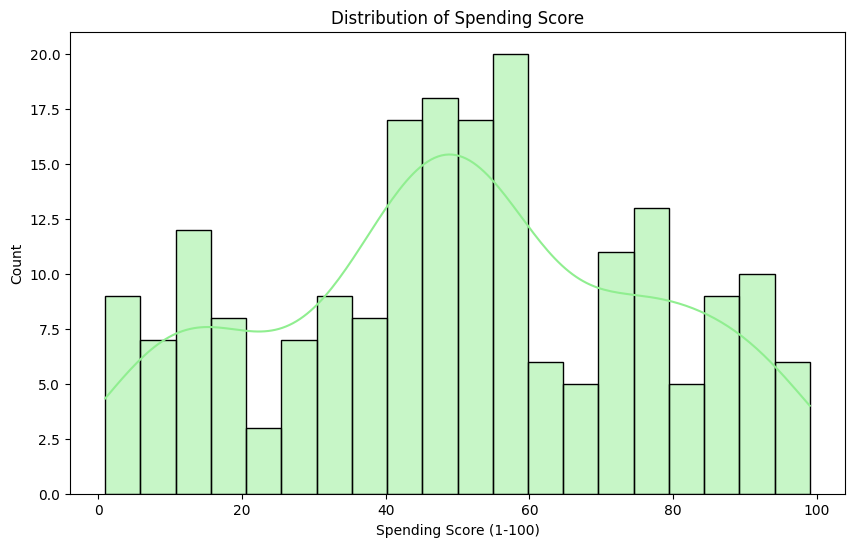

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Spending Score (1-100)', bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()

#### Relationships between Annual Income (k$) and Spending Score

<Figure size 1000x600 with 0 Axes>

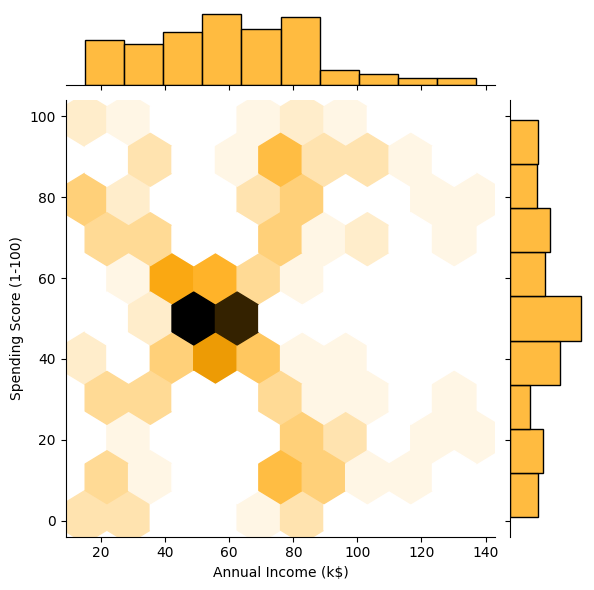

In [10]:
plt.figure(figsize=(10, 6))
sns.jointplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', kind='hex', color='orange')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Preparing Data for Clustering

In [11]:
df=df.drop('CustomerID', axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [14]:
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [15]:
scaled_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


## Applying K-Means Clustering

#### The elbow method 

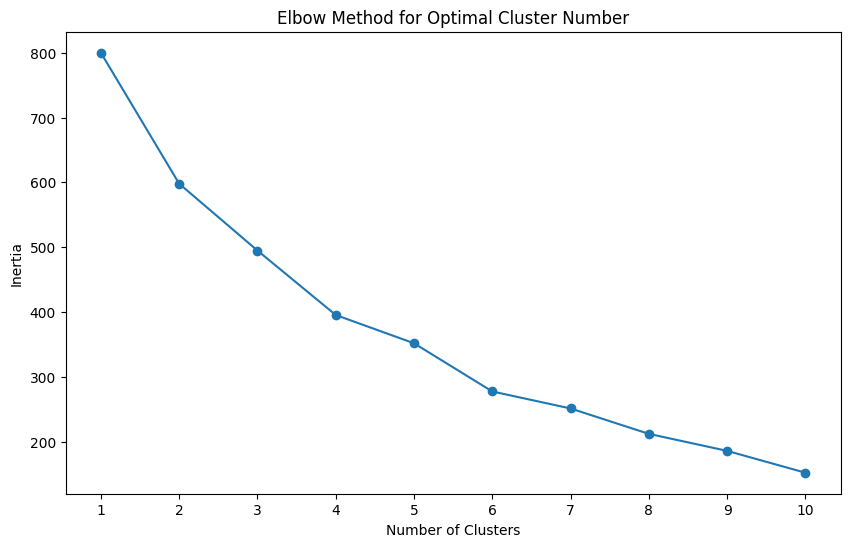

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11),)
plt.show()

#### The characteristics of each cluster

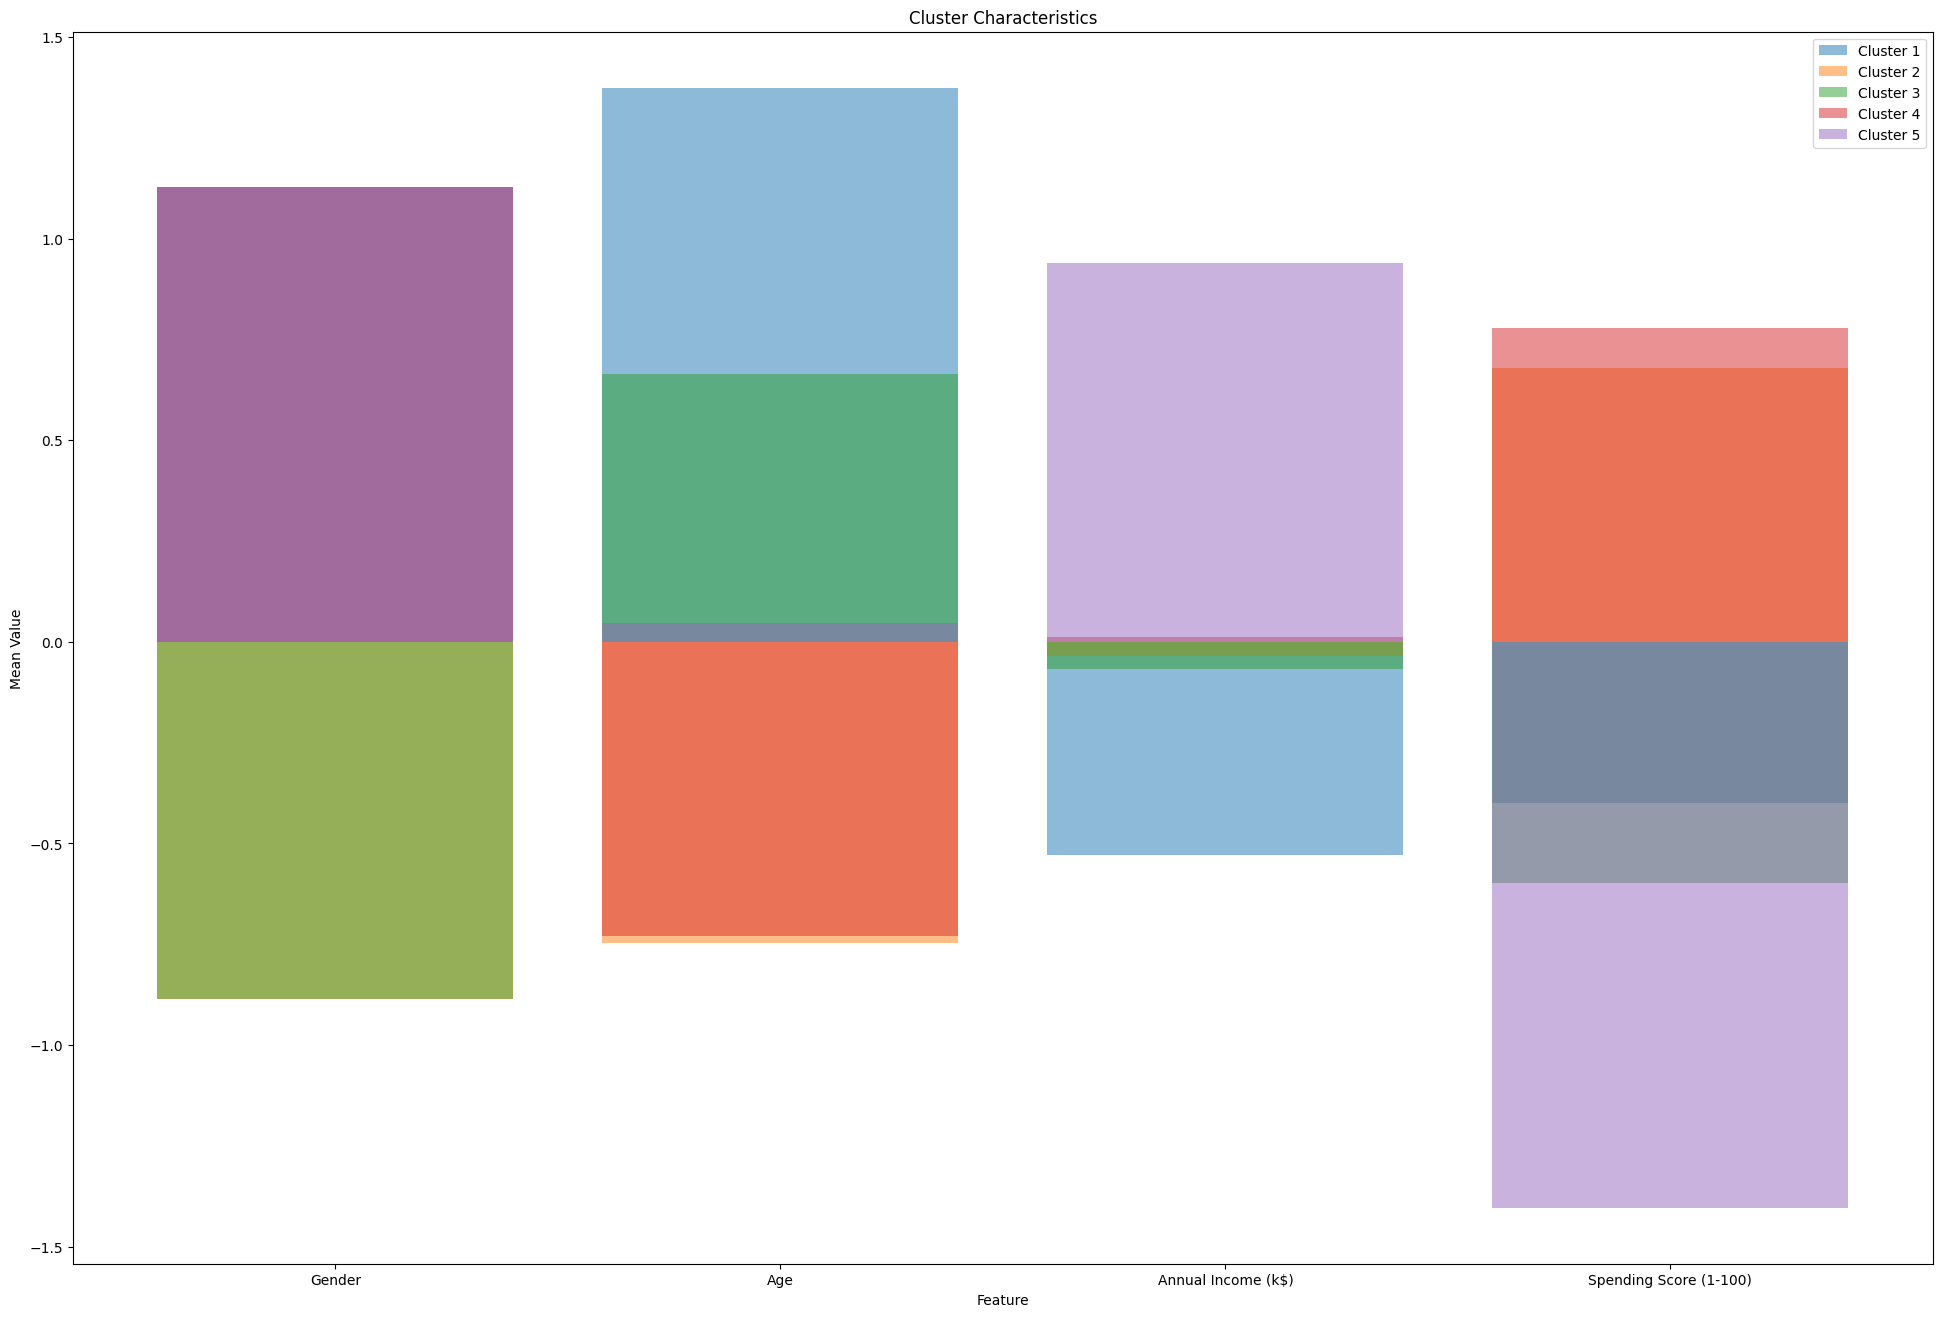

In [19]:
# Apply K-Means clustering s
kmeans = KMeans(n_clusters=5, random_state=42)
scaled_df['Cluster'] = kmeans.fit_predict(scaled_df)

# Analyze the characteristics of each cluster
centroids = kmeans.cluster_centers_
cluster_characteristics = pd.DataFrame(centroids, columns=scaled_df.columns) # Exclude 'Cluster' column
cluster_characteristics['Cluster'] = range(1, 5+ 1)

# Visualize cluster characteristics 
plt.figure(figsize=(24, 16))
for i in range(5):
    plt.bar(cluster_characteristics.columns[:-1], cluster_characteristics.iloc[i, :-1], alpha=0.5, label=f'Cluster {i+1}')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.title('Cluster Characteristics')
plt.legend()
plt.show()

##  Evaluation and Interpretation

#### The clustering result

In [20]:
print("Characteristics of Each Cluster:")
print(cluster_characteristics)

cluster_sizes = scaled_df['Cluster'].value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)

Characteristics of Each Cluster:
     Gender       Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0  1.128152  1.374332           -0.527854               -0.398966        1
1 -0.886405 -0.747192           -0.034098                0.678764        2
2 -0.886405  0.664494           -0.066484               -0.598558        3
3  1.128152 -0.729115            0.013159                0.777910        4
4  1.128152  0.046648            0.938586               -1.403399        5

Cluster Sizes:
Cluster
0    26
1    57
2    55
3    42
4    20
Name: count, dtype: int64


#### The clusters in a 2D plot, using Annual Income (k$) and Spending Score

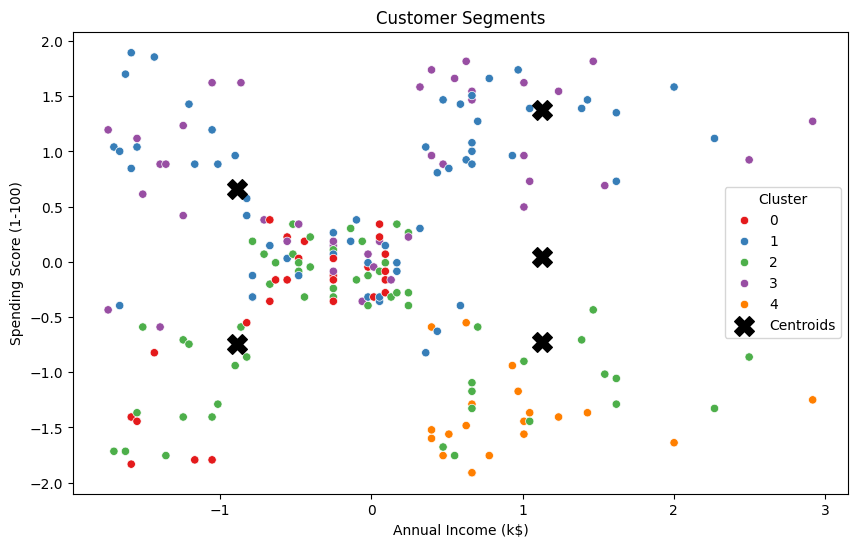

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scaled_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', legend='full')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()